## Flight delay dataset analysis

This dataset contains information about flights, such as date, location (origin and destination), distance of travel, departure time and possible causes of delay. We'll be analyzing the dataset to understand the whole picture of flight delays and identify what kind of factors contribute the most for it.
First, let's import the file and see which kind of data it contains

In [1]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import dask.dataframe as dd

In [2]:
df = pd.read_parquet(r'C:\Users\Sergio\Desktop\Danilo\Estudos\Python\flight delays\Flight_Delay.parquet')

In [3]:
df = pd.DataFrame(df)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head(50)

,Year,Month,DayofMonth,FlightDate,Marketing_Airline_Network,OriginCityName,DestCityName,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
48276,2021,2,20,2021-02-20,UA,"Chicago, IL","Rochester, MN",1900,1852.0,-8.0,0.0,17.0,1909.0,2000.0,3.0,2019,2003.0,-16.0,0.0,79.0,71.0,51.0,268.0,2,0.0,0.0,0.0,0.0,0.0
229015,2021,4,9,2021-04-09,WN,"Tampa, FL","Providence, RI",1225,1222.0,-3.0,0.0,9.0,1231.0,1454.0,4.0,1515,1458.0,-17.0,0.0,170.0,156.0,143.0,1136.0,5,0.0,0.0,0.0,0.0,0.0
508710,2022,3,6,2022-03-06,WN,"Sacramento, CA","Long Beach, CA",915,909.0,-6.0,0.0,9.0,918.0,1019.0,3.0,1045,1022.0,-23.0,0.0,90.0,73.0,61.0,387.0,2,0.0,0.0,0.0,0.0,0.0
207077,2018,6,1,2018-06-01,AS,"Kalispell, MT","Seattle, WA",525,514.0,-11.0,0.0,9.0,523.0,534.0,4.0,551,538.0,-13.0,0.0,86.0,84.0,71.0,379.0,2,0.0,0.0,0.0,0.0,0.0
251658,2021,8,8,2021-08-08,UA,"Sacramento, CA","Denver, CO",535,529.0,-6.0,0.0,13.0,542.0,836.0,7.0,856,843.0,-13.0,0.0,141.0,134.0,114.0,909.0,4,0.0,0.0,0.0,0.0,0.0
350883,2019,4,7,2019-04-07,AA,"Washington, DC","White Plains, NY",1710,1753.0,43.0,43.0,14.0,1807.0,1858.0,4.0,1828,1902.0,34.0,34.0,78.0,69.0,51.0,234.0,1,1.0,0.0,0.0,0.0,33.0
411935,2022,10,31,2022-10-31,WN,"Hilo, HI","Honolulu, HI",620,618.0,-2.0,0.0,9.0,627.0,707.0,3.0,715,710.0,-5.0,0.0,55.0,52.0,40.0,216.0,1,0.0,0.0,0.0,0.0,0.0
310318,2023,3,31,2023-03-31,AA,"Charleston/Dunbar, WV","Charlotte, NC",700,655.0,-5.0,0.0,20.0,715.0,755.0,14.0,825,809.0,-16.0,0.0,85.0,74.0,40.0,221.0,1,0.0,0.0,0.0,0.0,0.0
128466,2018,2,6,2018-02-06,AA,"New York, NY","West Palm Beach/Palm Beach, FL",1130,1129.0,-1.0,0.0,30.0,1159.0,1516.0,7.0,1451,1523.0,32.0,32.0,201.0,234.0,197.0,1035.0,5,0.0,0.0,32.0,0.0,0.0
175653,2018,4,19,2018-04-19,AA,"Oklahoma City, OK","Dallas/Fort Worth, TX",510,505.0,-5.0,0.0,15.0,520.0,558.0,4.0,607,602.0,-5.0,0.0,57.0,57.0,38.0,175.0,1,0.0,0.0,0.0,0.0,0.0


In [5]:
df.shape

(1517433, 29)

- The dataset contains 43 columns and more than 1.5 million records. Let's check for inconsistancies such as null values and duplicates.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517433 entries, 48276 to 159839
Data columns (total 29 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Year                       1517433 non-null  int64  
 1   Month                      1517433 non-null  int64  
 2   DayofMonth                 1517433 non-null  int64  
 3   FlightDate                 1517433 non-null  object 
 4   Marketing_Airline_Network  1517433 non-null  object 
 5   OriginCityName             1517433 non-null  object 
 6   DestCityName               1517433 non-null  object 
 7   CRSDepTime                 1517433 non-null  int64  
 8   DepTime                    1517433 non-null  float64
 9   DepDelay                   1517433 non-null  float64
 10  DepDelayMinutes            1517433 non-null  float64
 11  TaxiOut                    1517433 non-null  float64
 12  WheelsOff                  1517433 non-null  float64
 13  WheelsOn 

- There are no null values in the dataset.

In [8]:
df.duplicated().any()

False

- There are no duplicated rows in the dataset. <br>
- Null values:ok. Duplicates: ok. We'll convert FlightDate column to date and change its name to DepartureDate.

In [9]:
df = df.rename(columns={'FlightDate': 'DepartureDate'})
df['DepartureDate'] = pd.to_datetime(df['DepartureDate'])

Since some of the time columns are float numbers but don't have a decimal digit and the precision of minutes is enough, we'll convert them to integers.

In [10]:
float_columns = df.select_dtypes(include = 'float64').columns
df[float_columns] = df[float_columns].astype('int')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517433 entries, 48276 to 159839
Data columns (total 29 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Year                       1517433 non-null  int64         
 1   Month                      1517433 non-null  int64         
 2   DayofMonth                 1517433 non-null  int64         
 3   DepartureDate              1517433 non-null  datetime64[ns]
 4   Marketing_Airline_Network  1517433 non-null  object        
 5   OriginCityName             1517433 non-null  object        
 6   DestCityName               1517433 non-null  object        
 7   CRSDepTime                 1517433 non-null  int64         
 8   DepTime                    1517433 non-null  int32         
 9   DepDelay                   1517433 non-null  int32         
 10  DepDelayMinutes            1517433 non-null  int32         
 11  TaxiOut                    1517433

In [13]:
print(min(df['DepartureDate']))
print(max(df['DepartureDate']))
print(df['OriginCityName'].unique())
print(df['DestCityName'].unique())

2018-01-01 00:00:00
2023-04-30 00:00:00
['Chicago, IL' 'Tampa, FL' 'Sacramento, CA' 'Kalispell, MT'
 'Washington, DC' 'Hilo, HI' 'Charleston/Dunbar, WV' 'New York, NY'
 'Oklahoma City, OK' 'Dallas/Fort Worth, TX' 'Seattle, WA'
 'Minneapolis, MN' 'Charlotte, NC' 'La Crosse, WI' 'Denver, CO'
 'Pittsburgh, PA' 'Kahului, HI' 'Atlanta, GA' 'Omaha, NE' 'Detroit, MI'
 'Norfolk, VA' 'Savannah, GA' 'San Juan, PR' 'Phoenix, AZ'
 'Manchester, NH' 'Charleston, SC' 'Salt Lake City, UT' 'Fargo, ND'
 'Orlando, FL' 'Fort Lauderdale, FL' 'San Francisco, CA' 'Newark, NJ'
 'Islip, NY' 'Los Angeles, CA' 'Ithaca/Cortland, NY' 'Miami, FL'
 'Newport News/Williamsburg, VA' 'Rochester, NY' 'Kotzebue, AK'
 'San Diego, CA' 'Boston, MA' 'Austin, TX' 'Baltimore, MD' 'Las Vegas, NV'
 'Tallahassee, FL' 'Kansas City, MO' 'Bethel, AK' 'Shreveport, LA'
 'Helena, MT' 'Tucson, AZ' 'Philadelphia, PA' 'Cleveland, OH'
 'Longview, TX' 'Mission/McAllen/Edinburg, TX' 'San Jose, CA'
 'Fort Myers, FL' 'Hartford, CT' 'Tulsa, OK' 

- Flights goes from January 2018 to April 2023. All flights travel only in the USA.

ArrDelayMinutes column represents the arrival delay in minutes and, for the flights that had delay, it consists of the sum of CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay. Let's take a look a this column and understand its main statistics.

Percentage of delayed arrivals:  0.21483254944369867
       ArrDelayMinutes
count    325994.000000
mean         67.253612
std          92.797453
min          15.000000
25%          23.000000
50%          39.000000
75%          76.000000
max        5986.000000


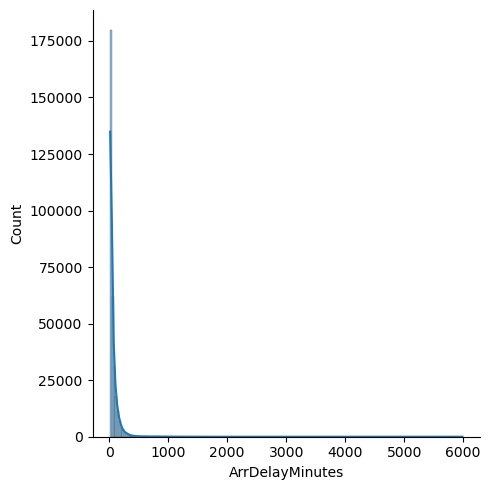

In [132]:
# Calculating the percentage of delayed arrivals of the total flights
mask = (df['ArrDelayMinutes'] > 0)

print('Percentage of delayed arrivals: ', len(df[mask]) / len(df['ArrDelayMinutes']))

# Calculating ArrDelayMinutes statistics and plotting histogram
df_delay = df[mask]

print(df_delay.loc[:, ['ArrDelayMinutes']].describe())

sns.displot(df_delay, x='ArrDelayMinutes', bins = 200, kde = True)

- 21% of the flights arrive at the destination with delay. Of those that are delayed, most have a delay time between 0 and 90 minutes. 
- The maximum delay registered in the period of analysis is more than 4 days.

Let's check if there's any correlation between ArrDelayMinutes and other columns. But first, we'll create a new column called FlightDelay that calculates the difference between the scheduled elapsed time of flight and the actual time of flight. This column will be included in our analysis.

In [15]:
df['FlightDelay'] = df['ActualElapsedTime'] - df['CRSElapsedTime']
mask = (df['ArrDelayMinutes'] > 0)
df_delay = df[mask]

In [194]:
mask_flightdelay = (df['FlightDelay'] > 0)

print('Percentage of flights that had delay during flight: ', len(df[mask_flightdelay]) / len(df))

print('All flights')
print(df['FlightDelay'].describe())

print()

print('Flights that had delay during flight')
print(df[mask_flightdelay].loc[:, ['FlightDelay']].describe())

Percentage of flights that had delay during flight:  0.18371750186004918
All flights
count    1.517433e+06
mean    -6.864285e+00
std      1.361950e+01
min     -1.452000e+03
25%     -1.400000e+01
50%     -8.000000e+00
75%     -2.000000e+00
max      2.850000e+02
Name: FlightDelay, dtype: float64

Flights that had delay during flight
         FlightDelay
count  278779.000000
mean       12.787089
std        15.910919
min         1.000000
25%         3.000000
50%         6.000000
75%        18.000000
max       285.000000


- Nearly 1/5 of total flights face arrival delays, but most of them are not caused by flight delays: actually, more than 75% of total flights travel faster than predicted

<Axes: >

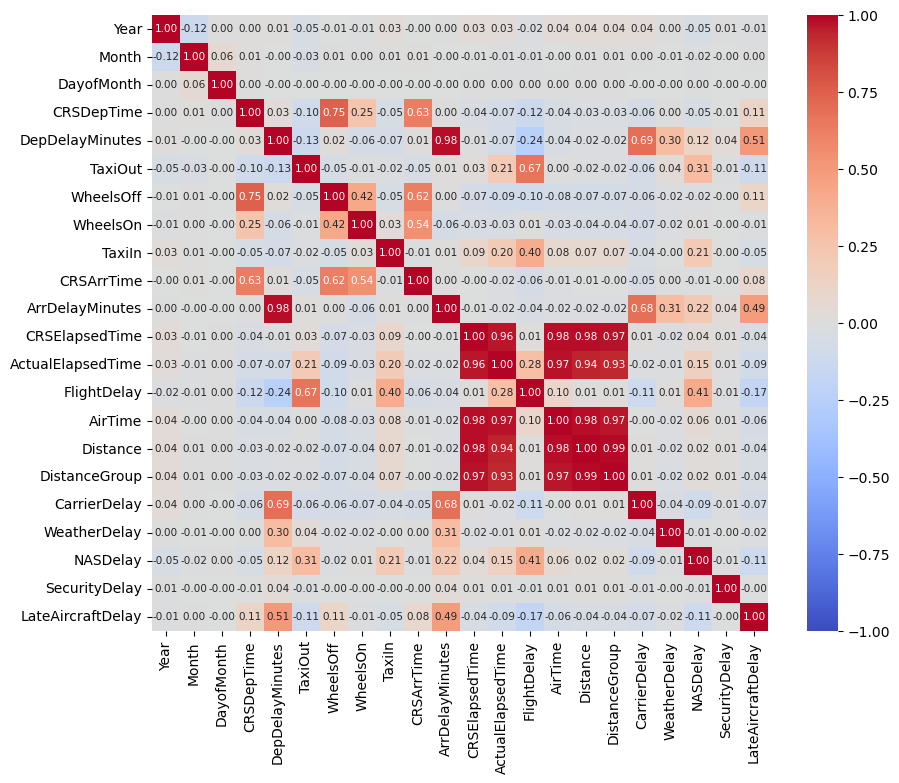

In [16]:
df_delay_matrix = df_delay.loc[:, [
    'Year',
    'Month',
    'DayofMonth',
    'CRSDepTime',
    'DepDelayMinutes',
    'TaxiOut',
    'WheelsOff',
    'WheelsOn',
    'TaxiIn',
    'CRSArrTime',
    'ArrDelayMinutes',
    'CRSElapsedTime',
    'ActualElapsedTime',
    'FlightDelay',
    'AirTime',
    'Distance',
    'DistanceGroup',
    'CarrierDelay',
    'WeatherDelay',
    'NASDelay',
    'SecurityDelay',
    'LateAircraftDelay'
]]

df_delay_matrix = df_delay_matrix.select_dtypes(include=['number']).corr()

plt.figure(figsize = (10,8))
sns.heatmap(df_delay_matrix, 
            cmap = 'coolwarm', 
            vmax = 1.0, 
            vmin = -1.0, 
            annot = True, 
            fmt = '.2f', 
            annot_kws = {'size':7.5}, 
            square = True)


- The correlation matrix shows that there's a significant correlation between arrival and departure delays. Arrival delay has a considerable correlation with CarrierDelay and a very small correlation with FlightDelay. <br>
- Since DepDelayMinutes seems to be the most relevant reason for arrival delays, we're going to focus our next steps on it.

<Axes: xlabel='DepDelayMinutes', ylabel='ArrDelayMinutes'>

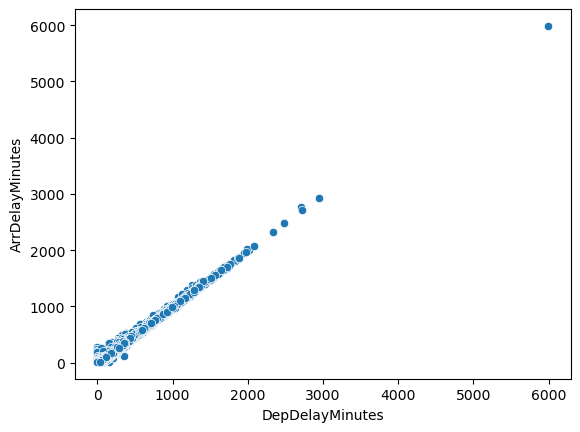

In [17]:
sns.scatterplot(df_delay, x = 'DepDelayMinutes', y = 'ArrDelayMinutes')

In [214]:
mask_depdelay = (df_delay['DepDelayMinutes'] > 0)

df_delay[mask_depdelay].loc[:, ['DepDelayMinutes']].describe()

,DepDelayMinutes
count,285937.000000
mean,72.386805
std,98.665867
min,1.000000
25%,26.000000
50%,46.000000
75%,85.000000
max,5995.000000


<Axes: xlabel='CRSDepTime', ylabel='DepDelayMinutes'>

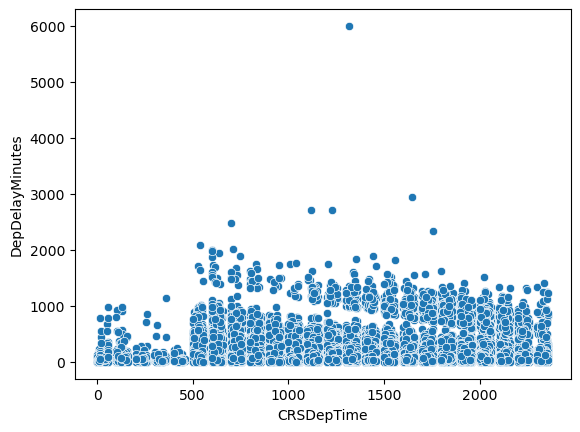

In [18]:
sns.scatterplot(df_delay, x = 'CRSDepTime', y = 'DepDelayMinutes')

In [101]:
mask_0to5 = (df['CRSDepTime'] > 0) & (df['CRSDepTime'] <= 500)
mask_0to5_delay = (df['CRSDepTime'] > 0) & (df['CRSDepTime'] <= 500) & (df['DepDelayMinutes'] > 0)
print('Percentage of delayed arrivals (0 to 5 am): ', len(df[mask_0to5_delay]) / len(df[mask_0to5]))
print('Average delay, minutes (0 to 5 am): ', df[mask_0to5_delay].loc[:, 'DepDelayMinutes'].mean())

print()

mask_5to0 = (df['CRSDepTime'] > 500) & (df['CRSDepTime'] <= 2400)
mask_5to0_delay = (df['CRSDepTime'] > 500) & (df['CRSDepTime'] <= 2400) & (df['DepDelayMinutes'] > 0)
print('Percentage of delayed arrivals (5 to 0 am): ', len(df[mask_5to0_delay]) / len(df[mask_5to0]))
print('Average delay, minutes (5 to 0 am): ', df[mask_5to0_delay].loc[:, 'DepDelayMinutes'].mean())

Percentage of delayed arrivals (0 to 5 am):  0.2641629535327817
Average delay, minutes (0 to 5 am):  49.70361445783133

Percentage of delayed arrivals (5 to 0 am):  0.29656500028484784
Average delay, minutes (5 to 0 am):  48.26390924036382


- The departure delay vs. scheduled departure time chart and calculated numbers show that between 0:00 and 5:00 am flights tend to have less chances of delay, but the time of delay is almost the same when compared to 5:00 to 0:00 am. 
- Delays tend to be longer in the morning, decreasing throughout the day. Let's see if this behaviour is connected to the volume of flights

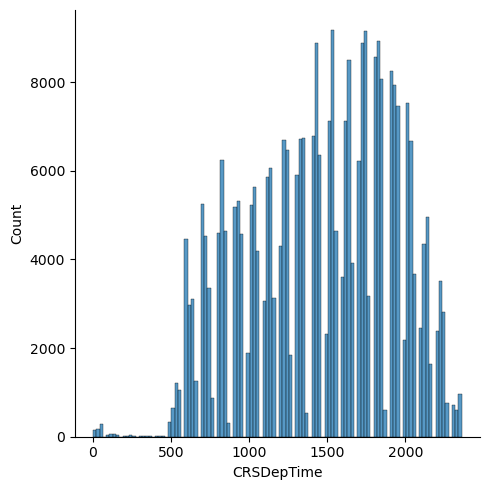

In [19]:
sns.displot(df_delay, x = 'CRSDepTime')

- The number of flights increases massively from 5:00 onwards, which matches with the last chart, but throughout the rest of the day the number of flights increases, while departure delay decreases. Departure delay is related to the number of flights but certainly there are other factors involved in this equation. Let's continue the exploration.

<Axes: xlabel='Marketing_Airline_Network', ylabel='DepDelayMinutes'>

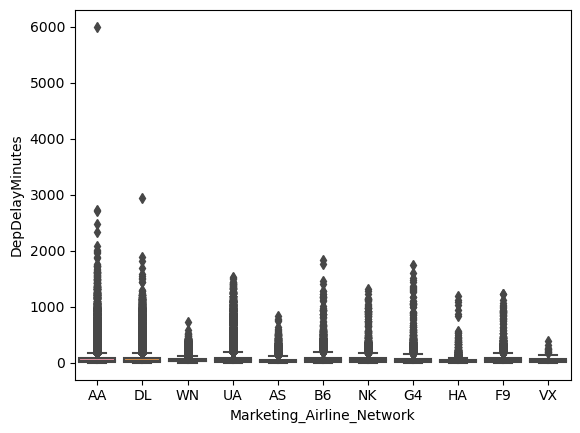

In [20]:
sns.boxplot(df_delay, x = 'Marketing_Airline_Network', y = 'DepDelayMinutes')

In [21]:
df_delay.groupby('Marketing_Airline_Network')['DepDelayMinutes'].describe()

,count,mean,std,min,25%,50%,75%,max
Marketing_Airline_Network,,,,,,,,
AA,85632.0,64.987376,106.699343,0.0,15.0,39.0,79.0,5995.0
AS,15712.0,43.800980,55.859665,0.0,9.0,29.0,57.0,839.0
B6,17008.0,72.466134,89.475787,0.0,22.0,47.0,93.0,1834.0
DL,54867.0,68.707638,108.355347,0.0,16.0,40.0,81.0,2941.0
F9,8808.0,67.140100,85.279412,0.0,22.0,45.0,84.0,1231.0
G4,7127.0,67.007016,107.393997,0.0,18.0,37.0,76.0,1747.0
HA,2843.0,40.691875,72.510273,0.0,12.5,24.0,42.0,1183.0
NK,10484.0,64.080694,89.679517,0.0,18.0,41.0,80.0,1322.0
UA,63693.0,70.768373,108.681573,0.0,14.0,42.0,87.0,1534.0


- When looking at percentiles and mean we can see that there are differences between companies. Some have a higher number of flights, while others have just a few. <br>
- In general, we can say that WN is the best in terms of delay, considering the numbers shown and the quantity of flights, while B6 seems to be worst.

Text(0.5, 0, 'Number of flights')

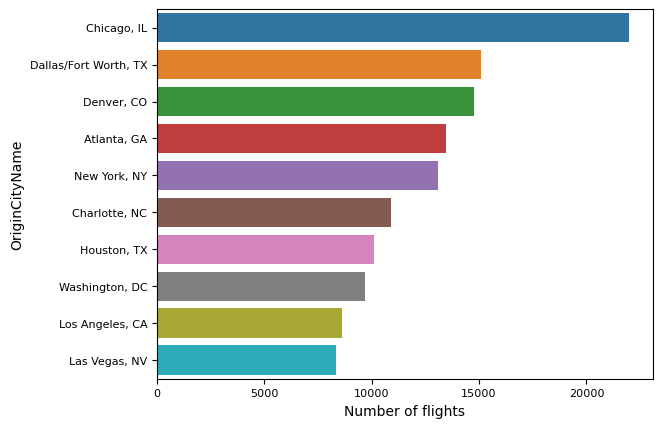

In [116]:
sns.barplot(df_delay[['OriginCityName', 'DepDelayMinutes']].groupby(['OriginCityName']).count()
            .sort_values(by = 'DepDelayMinutes', ascending = False).head(10).reset_index(),
            x = 'DepDelayMinutes', y = 'OriginCityName').tick_params(labelsize = 8)
plt.xlabel('Number of flights')

<Figure size 2000x1500 with 0 Axes>

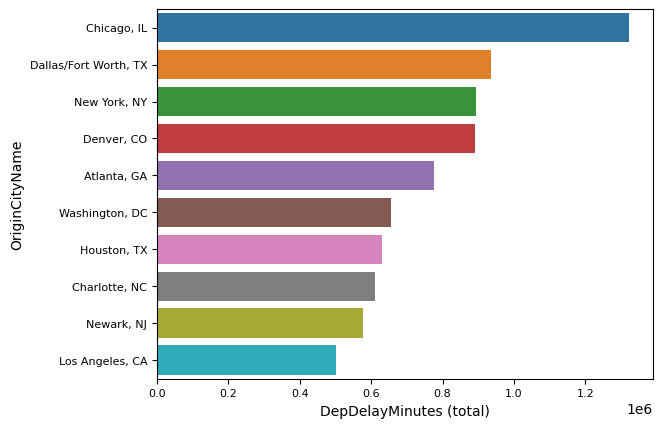

<Figure size 2000x1500 with 0 Axes>

In [65]:
sns.barplot(df_delay[['OriginCityName', 'DepDelayMinutes']].groupby(['OriginCityName']).sum()
            .sort_values(by = 'DepDelayMinutes', ascending = False).head(10).reset_index(),
            x = 'DepDelayMinutes', y = 'OriginCityName').tick_params(labelsize = 8)
plt.xlabel('DepDelayMinutes (total)')
plt.figure(figsize = (20,15))

<Figure size 2000x1500 with 0 Axes>

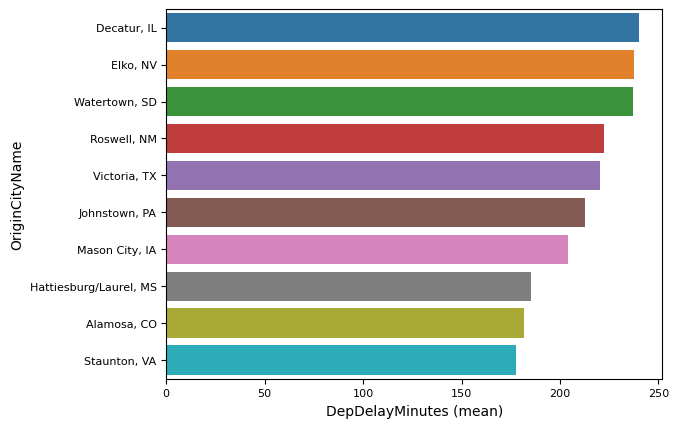

<Figure size 2000x1500 with 0 Axes>

In [66]:
sns.barplot(df_delay[['OriginCityName', 'DepDelayMinutes']].groupby(['OriginCityName']).mean()
            .sort_values(by = 'DepDelayMinutes', ascending = False).head(10).reset_index(),
            x = 'DepDelayMinutes', y = 'OriginCityName').tick_params(labelsize = 8)
plt.xlabel('DepDelayMinutes (mean)')
plt.figure(figsize = (20,15))

From the charts above, we can see that the the first two charts contain only big cities, while the third one has only small ones. Let's see the differences between the two groups.

In [92]:
# Small cities group
smallcities = ['Decatur, IL', 'Elko, NV', 'Watertown, SD', 'Roswell, NM', 'Victoria, TX', 'Johnstown, PA', 'Mason City, IA', 'Hattiesburg/Laurel, MS', 'Alamosa, CO', 'Staunton, VA']
filter_smallcities = df_delay['OriginCityName'].isin(smallcities)
df_smallcities = df_delay[filter_smallcities]

# Big cities group
bigcities = ['Chicago, IL', 'Dallas/Fort Worth, TX', 'New York, NY', 'Denver, CO', 'Atlanta, GA', 'Washington, DC,', 'Houston, TX', 'Charlotte, NC', 'Newark, NJ', 'Los Angeles, CA']
filter_bigcities = df_delay['OriginCityName'].isin(bigcities)
df_bigcities = df_delay[filter_bigcities]

In [94]:
df_smallcities.groupby('OriginCityName')['DepDelayMinutes'].describe()

,count,mean,std,min,25%,50%,75%,max
OriginCityName,,,,,,,,
"Alamosa, CO",3.0,181.666667,214.532826,16.0,60.50,105.0,264.50,424.0
"Decatur, IL",11.0,240.000000,297.094934,0.0,32.50,201.0,337.50,1013.0
"Elko, NV",16.0,237.500000,377.060031,0.0,6.75,28.0,258.25,1112.0
"Hattiesburg/Laurel, MS",34.0,185.529412,322.117825,0.0,23.25,44.0,179.00,1377.0
"Johnstown, PA",12.0,212.750000,320.355236,0.0,26.00,117.0,238.75,1132.0
"Mason City, IA",6.0,204.000000,367.505646,0.0,0.00,29.5,190.25,931.0
"Roswell, NM",39.0,222.410256,320.458530,0.0,31.50,86.0,283.00,1396.0
"Staunton, VA",37.0,177.837838,251.882525,0.0,29.00,70.0,211.00,1153.0
"Victoria, TX",6.0,220.333333,259.528547,30.0,48.50,111.0,285.25,699.0


In [95]:
df_bigcities.groupby('OriginCityName')['DepDelayMinutes'].describe()

,count,mean,std,min,25%,50%,75%,max
OriginCityName,,,,,,,,
"Atlanta, GA",13476.0,57.520184,81.151729,0.0,20.0,37.0,68.0,1504.0
"Charlotte, NC",10878.0,56.199853,75.811446,0.0,15.0,37.0,74.0,1245.0
"Chicago, IL",21994.0,60.161544,94.493518,0.0,16.0,40.0,76.0,5995.0
"Dallas/Fort Worth, TX",15069.0,62.092641,89.010438,0.0,19.0,40.0,76.0,1619.0
"Denver, CO",14748.0,60.358082,89.686842,0.0,19.0,39.0,73.0,2477.0
"Houston, TX",10109.0,62.360965,92.311226,0.0,19.0,40.0,75.0,1607.0
"Los Angeles, CA",8633.0,58.064983,83.524937,0.0,17.0,38.0,70.0,1615.0
"New York, NY",13082.0,68.253937,91.216366,0.0,15.0,44.0,88.0,1141.0
"Newark, NJ",8302.0,69.563358,91.166656,0.0,19.0,46.0,90.0,1753.0


- We can see that small cities have just a few flights that got delayed (total number of flights is considerably lower when compared to big cities), and percentiles and mean of departure delay time are higher than those in the group of big cities. It would be interesting to have a deeper understanding of departure delays in small cities, but since it doesn't represent a significant percentage of the whole dataset, we will not focus on this group in particular. <br>
- (Just to clarify, it was curious to note that all cities with the highest departure delay means were small, which doesn't mean that all small cities in the dataset have long delays)

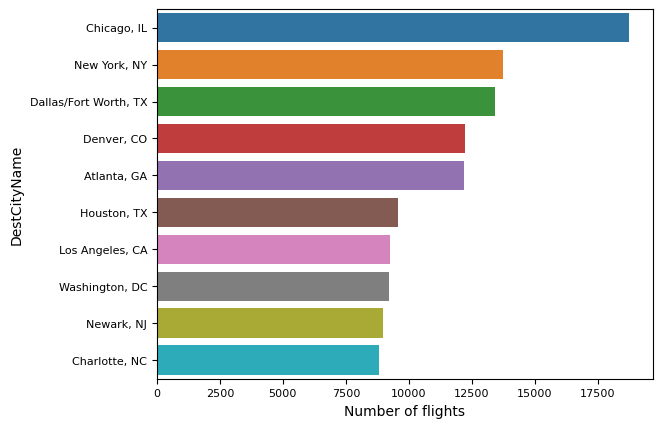

In [103]:
sns.barplot(df_delay[['DestCityName', 'DepDelayMinutes']].groupby(['DestCityName']).count()
            .sort_values(by = 'DepDelayMinutes', ascending = False).head(10).reset_index(),
            x = 'DepDelayMinutes', y = 'DestCityName').tick_params(labelsize = 8)
plt.xlabel('Number of flights')
plt.show()

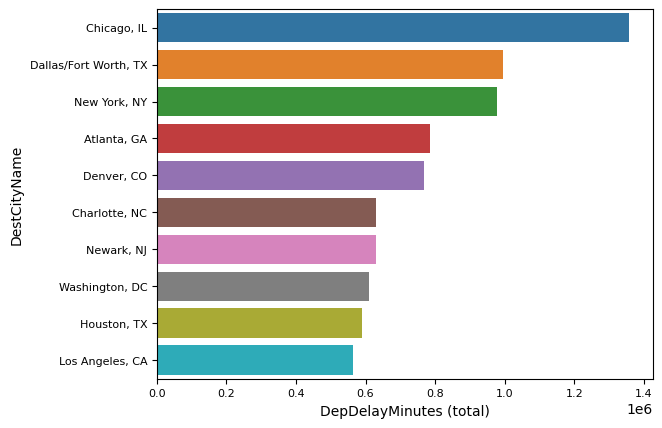

In [154]:
sns.barplot(df_delay[['DestCityName', 'DepDelayMinutes']].groupby(['DestCityName']).sum()
            .sort_values(by = 'DepDelayMinutes', ascending = False).head(10).reset_index(),
            x = 'DepDelayMinutes', y = 'DestCityName').tick_params(labelsize = 8)
plt.xlabel('DepDelayMinutes (total)')
plt.show()

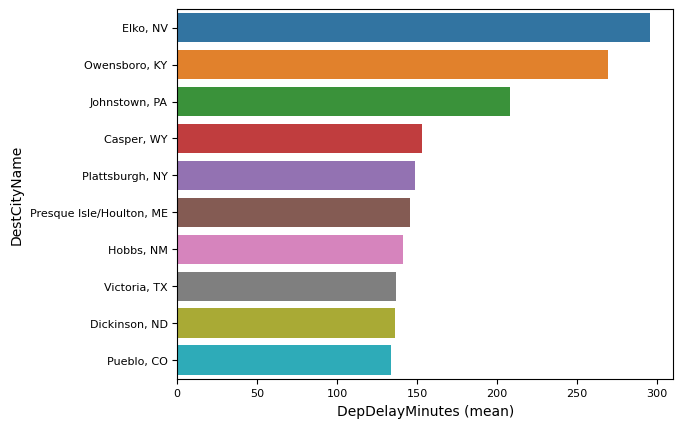

In [155]:
sns.barplot(df_delay[['DestCityName', 'DepDelayMinutes']].groupby(['DestCityName']).mean()
            .sort_values(by = 'DepDelayMinutes', ascending = False).head(10).reset_index(),
            x = 'DepDelayMinutes', y = 'DestCityName').tick_params(labelsize = 8)
plt.xlabel('DepDelayMinutes (mean)')
plt.show()

- When looking at destination cities, the conclusions are quite the same as the ones that we got from origin cities

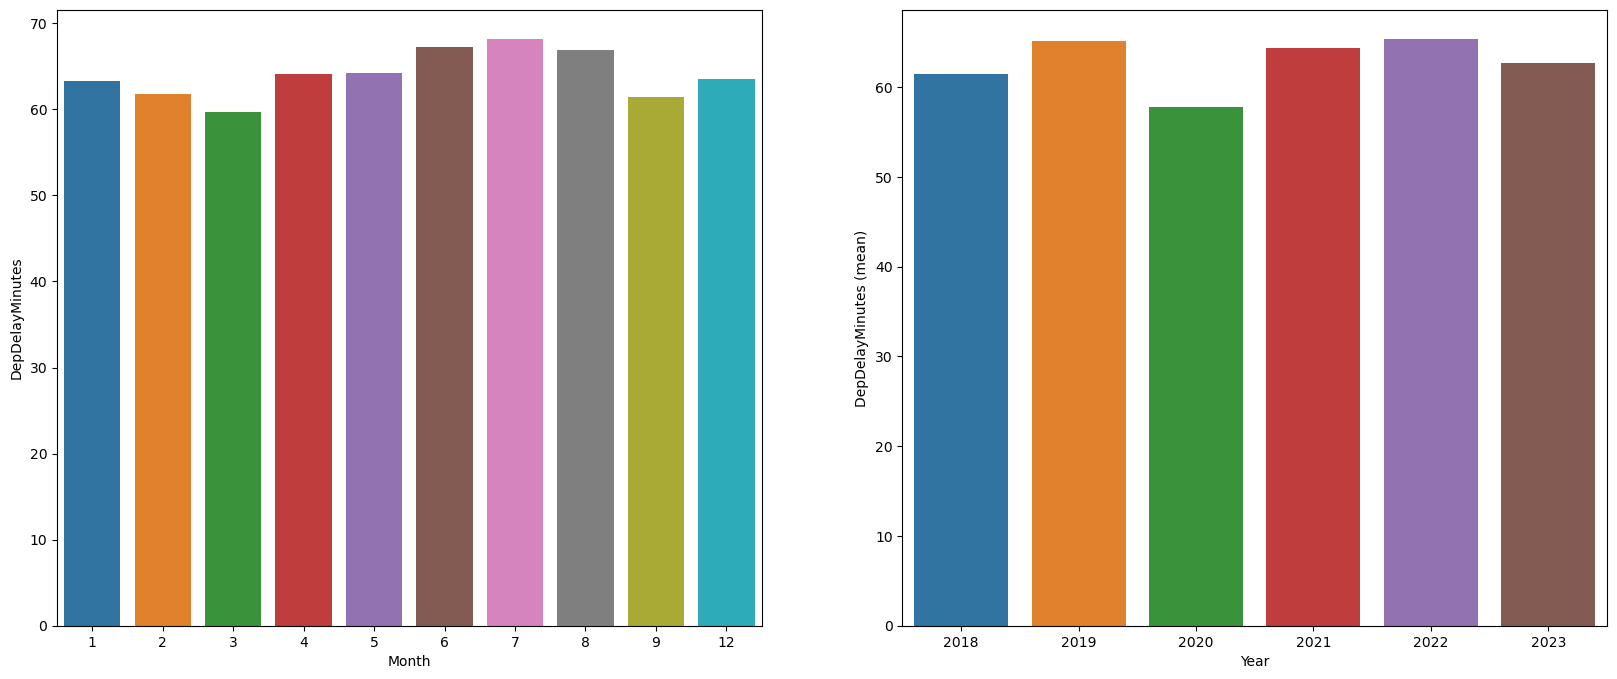

In [129]:
f, ax = plt.subplots(1, 2, figsize = (20, 8))

sns.barplot(df_delay[['Month', 'DepDelayMinutes']].groupby(['Month']).mean()
            .sort_values(by = 'DepDelayMinutes', ascending = False).head(10).reset_index(),
            x = 'Month', y = 'DepDelayMinutes', ax = ax[0])
plt.xlabel('Months')
plt.ylabel('DepDelayMinutes (mean)')

sns.barplot(df_delay[['Year', 'DepDelayMinutes']].groupby(['Year']).mean()
            .sort_values(by = 'DepDelayMinutes', ascending = False).head(10).reset_index(),
            x = 'Year', y = 'DepDelayMinutes', ax = ax[1])
plt.xlabel('Year')
plt.ylabel('DepDelayMinutes (mean)')

plt.show()

- Apparently there is not a significant difference in departure delay time between months or year. It is interesting to see that 2020 got the lowest mean. Maybe this is related to Covid-19 and the massive reduction in airport activities.

Now, let's analyze two other factors that seemed to have impact on arrival delays: Carrier and Late Aircraft delays.

Percentage of carrier delay:  0.5340251661073516

All flights with arrival delay
count    325994.000000
mean         23.686102
std          71.424715
min           0.000000
25%           0.000000
50%           2.000000
75%          22.000000
max        5986.000000
Name: CarrierDelay, dtype: float64

Flights with positive carrier delay
        CarrierDelay
count  174089.000000
mean       44.353905
std        92.931288
min         1.000000
25%         9.000000
50%        20.000000
75%        44.000000
max      5986.000000


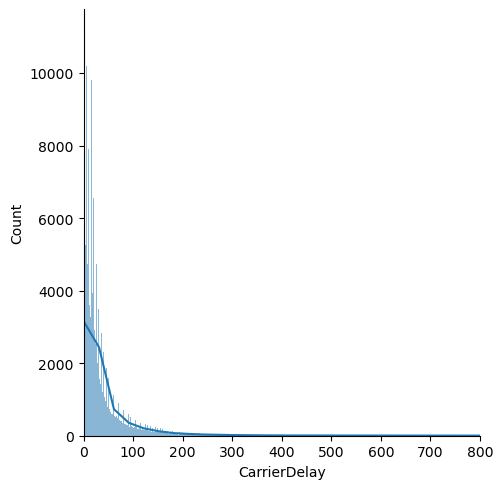

In [181]:
mask_carrierdelay = (df_delay['CarrierDelay'] > 0)
print('Percentage of carrier delay: ', len(df_delay[mask_carrierdelay]) / len(df_delay))

print()

print('All flights with arrival delay')
print(df_delay['CarrierDelay'].describe())

print()

print('Flights with positive carrier delay')
print(df_delay[mask_carrierdelay].loc[:, ['CarrierDelay']].describe())

sns.displot(df_delay[mask_carrierdelay], x = 'CarrierDelay', kde = True)
plt.xlim(0, 800) # Limiting x axis to visualize better
plt.show()

Percentage of Late Aircraft delay:  0.4876531469904354

All flights with arrival delay
count    325994.000000
mean         25.586453
std          54.167642
min           0.000000
25%           0.000000
50%           0.000000
75%          30.000000
max        2014.000000
Name: LateAircraftDelay, dtype: float64

Flights with positive LateAircraft delay
       LateAircraftDelay
count      158972.000000
mean           52.468548
std            67.870399
min             1.000000
25%            16.000000
50%            31.000000
75%            65.000000
max          2014.000000


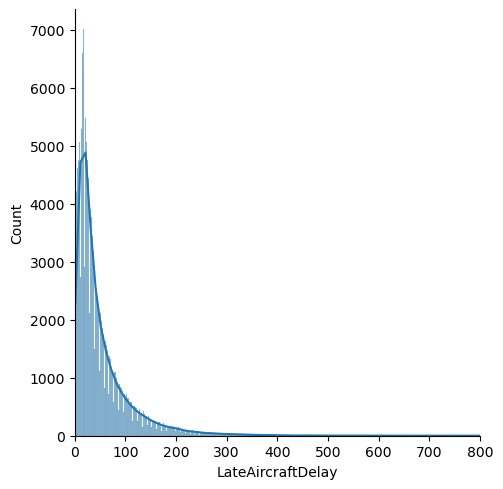

In [200]:
mask_LateAircraftdelay = (df_delay['LateAircraftDelay'] > 0)
print('Percentage of Late Aircraft delay: ', len(df_delay[mask_LateAircraftdelay]) / len(df_delay))

print()

print('All flights with arrival delay')
print(df_delay['LateAircraftDelay'].describe())

print()

print('Flights with positive LateAircraft delay')
print(df_delay[mask_LateAircraftdelay].loc[:, ['LateAircraftDelay']].describe())

sns.displot(df_delay[mask_LateAircraftdelay], x = 'LateAircraftDelay', kde = True)
plt.xlim(0, 800) # Limiting x axis to visualize better
plt.show()

- We already knew that ~21% of total flights had arrival delay and now we know that ~53% of those 21% have carrier delay and ~48% of those 21% have late aircraft delay. That means that ~11% of total flights have carrier delay and ~10% of total flights have late aircraft delay, which are quite considerable numbers. <br>
- Of those 11%, 50% have a delay shorter than 20 minutes. In other words, 5% of total flights have a carrier delay of 0-20 minutes. 
- Of those 10%, 50% have a delay shorter than 30 minutes. In other words, 5% of total flights have a late aircraft delay of 0-30 minutes. 

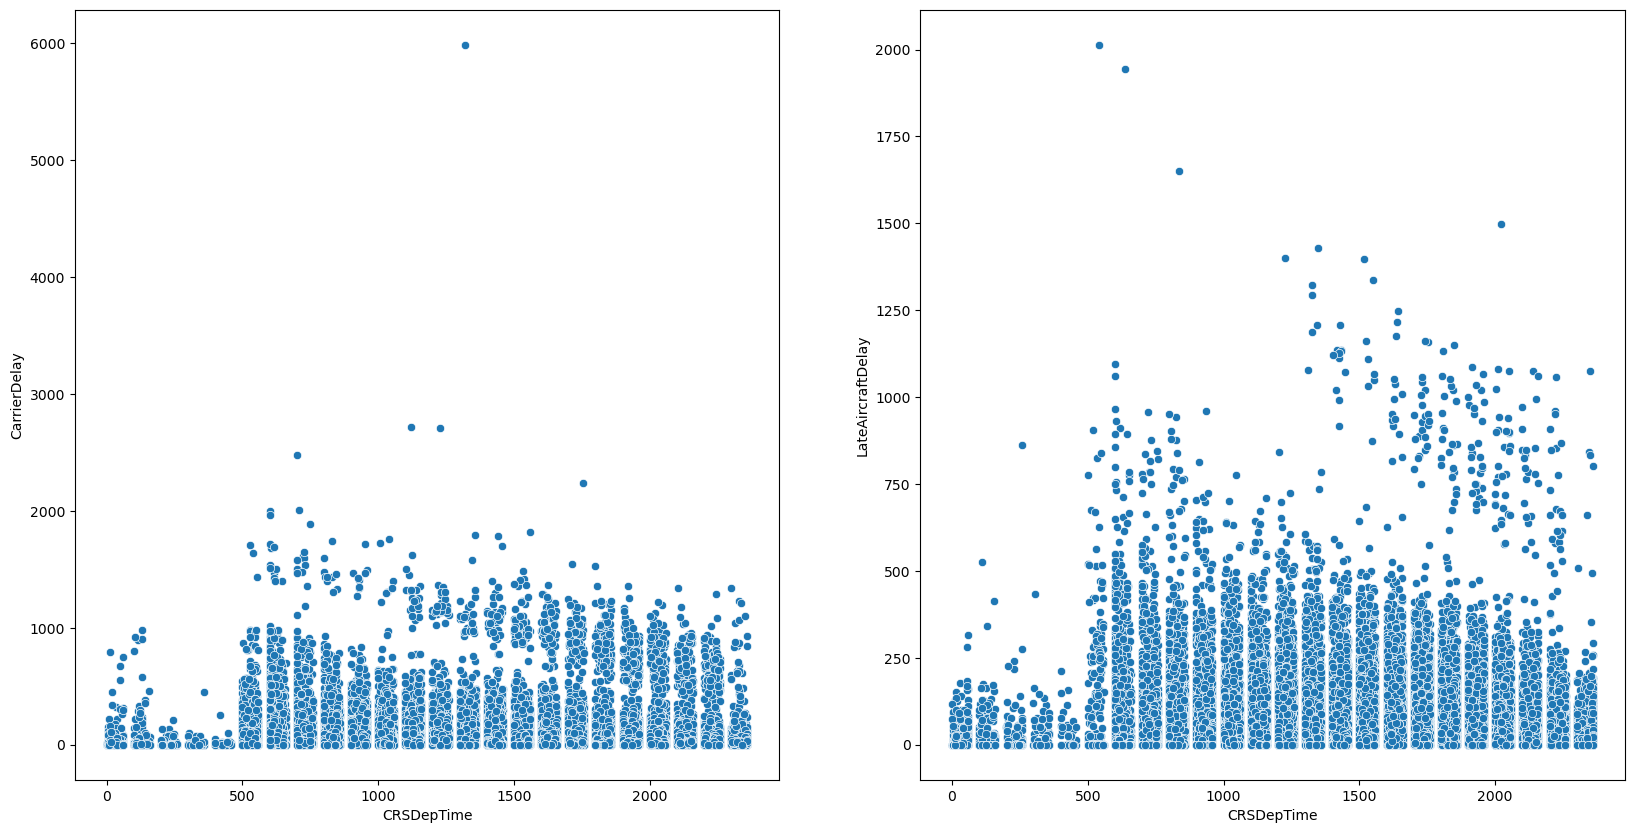

In [204]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))

sns.scatterplot(df_delay, x = 'CRSDepTime', y = 'CarrierDelay', ax = ax[0])
sns.scatterplot(df_delay, x = 'CRSDepTime', y = 'LateAircraftDelay', ax = ax[1])

plt.show()

- Carrier and late aicraft delays have a similar distribution throughout the day vs. departure delay

In [208]:
df_delay[mask_carrierdelay].groupby('Marketing_Airline_Network')['CarrierDelay'].describe()

,count,mean,std,min,25%,50%,75%,max
Marketing_Airline_Network,,,,,,,,
AA,43527.0,46.005514,110.455046,1.0,8.0,20.0,45.0,5986.0
AS,5835.0,43.894602,59.267197,1.0,15.0,25.0,50.0,839.0
B6,12221.0,40.815563,73.927242,1.0,9.0,19.0,41.0,1791.0
DL,27442.0,60.842941,112.906813,1.0,14.0,27.0,63.0,1822.0
F9,5060.0,38.099605,74.134926,1.0,8.0,18.0,39.0,1231.0
G4,3270.0,53.157798,113.984133,1.0,9.0,19.0,47.0,1367.0
HA,2345.0,33.389339,71.934886,1.0,10.0,19.0,30.0,1190.0
NK,4901.0,37.354213,73.377866,1.0,8.0,18.0,38.0,1256.0
UA,29880.0,54.267537,107.695656,1.0,12.0,24.0,54.0,1502.0


In [209]:
df_delay[mask_LateAircraftdelay].groupby('Marketing_Airline_Network')['LateAircraftDelay'].describe()

,count,mean,std,min,25%,50%,75%,max
Marketing_Airline_Network,,,,,,,,
AA,42939.0,57.817019,78.807310,1.0,17.00,35.0,71.0,2014.0
AS,5939.0,49.242633,49.848625,1.0,19.00,32.0,59.0,583.0
B6,8816.0,56.281307,63.881866,1.0,16.00,34.0,74.0,841.0
DL,21509.0,51.855037,63.107179,1.0,16.00,31.0,65.0,1161.0
F9,4462.0,60.768041,75.587605,1.0,18.00,37.0,77.0,1078.0
G4,4231.0,52.060978,70.063109,1.0,16.00,30.0,63.0,1498.0
HA,1405.0,31.900356,37.641339,1.0,12.00,20.0,35.0,414.0
NK,3162.0,63.267868,78.599333,1.0,20.00,39.0,77.0,1110.0
UA,26655.0,66.531608,81.891695,1.0,20.00,42.0,84.0,1401.0


- Here we can see some differences between companies. Again, WN seems to be one of the best in terms of delay (now looking at carrier and late aircraft delay). DL and UA seems to be the worst.

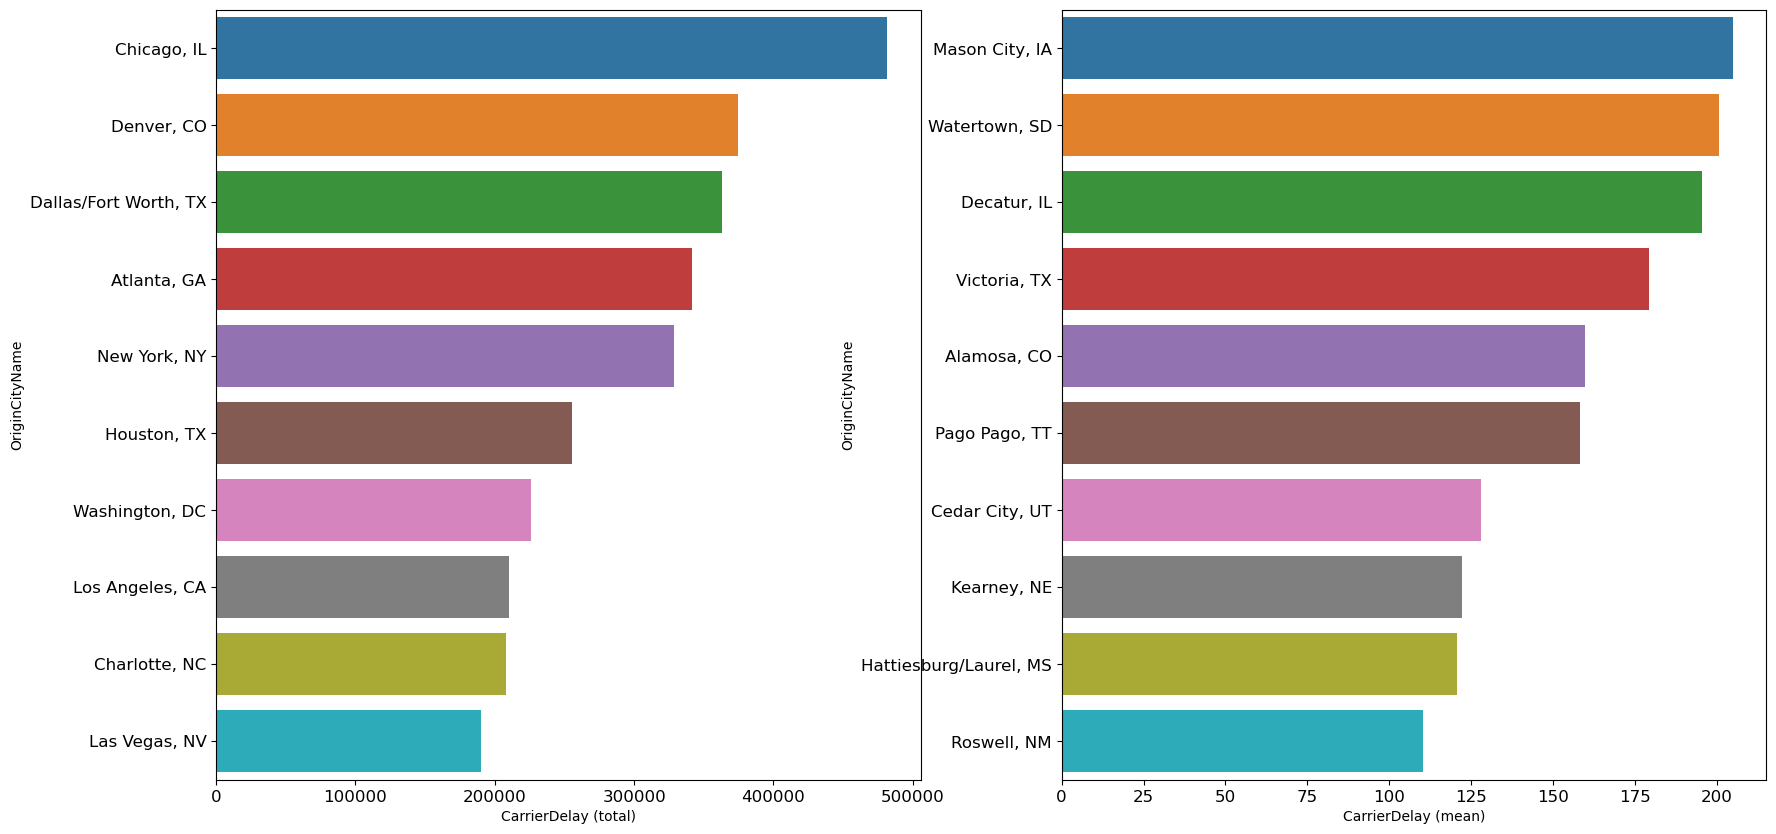

In [178]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))

sns.barplot(df_delay[['OriginCityName', 'CarrierDelay']].groupby(['OriginCityName']).sum()
            .sort_values(by = 'CarrierDelay', ascending = False).head(10).reset_index(),
            x = 'CarrierDelay', y = 'OriginCityName', ax = ax[0]).tick_params(labelsize = 12)
ax[0].set_xlabel('CarrierDelay (total)')

sns.barplot(df_delay[['OriginCityName', 'CarrierDelay']].groupby(['OriginCityName']).mean()
            .sort_values(by = 'CarrierDelay', ascending = False).head(10).reset_index(),
            x = 'CarrierDelay', y = 'OriginCityName', ax = ax[1]).tick_params(labelsize = 12)
ax[1].set_xlabel('CarrierDelay (mean)')
plt.show()

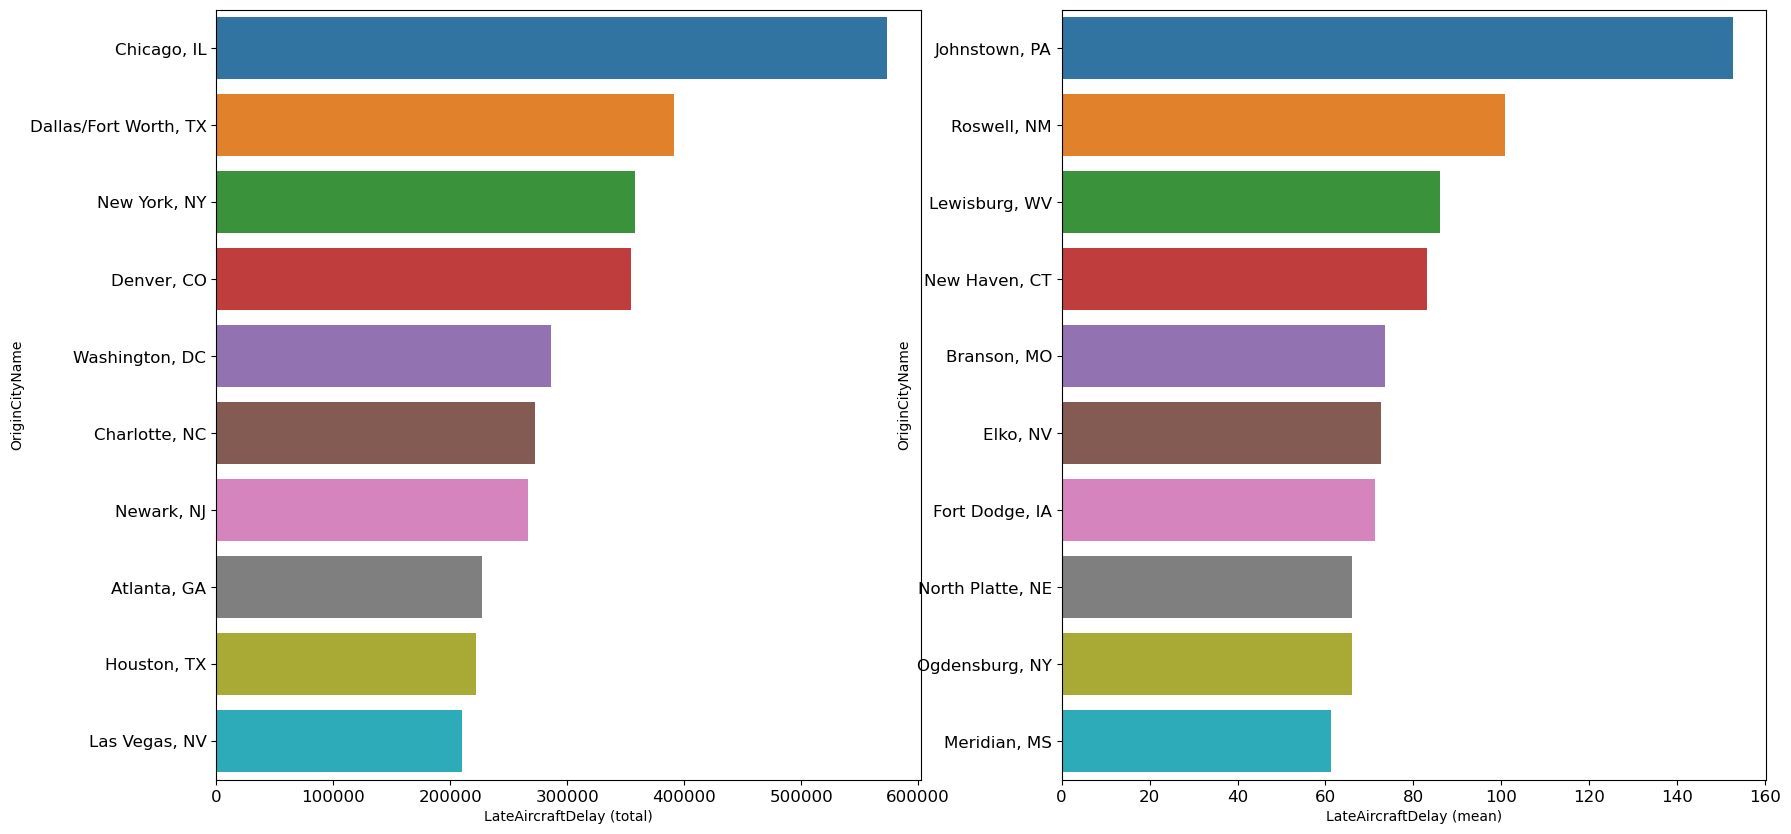

In [210]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))

sns.barplot(df_delay[['OriginCityName', 'LateAircraftDelay']].groupby(['OriginCityName']).sum()
            .sort_values(by = 'LateAircraftDelay', ascending = False).head(10).reset_index(),
            x = 'LateAircraftDelay', y = 'OriginCityName', ax = ax[0]).tick_params(labelsize = 12)
ax[0].set_xlabel('LateAircraftDelay (total)')

sns.barplot(df_delay[['OriginCityName', 'LateAircraftDelay']].groupby(['OriginCityName']).mean()
            .sort_values(by = 'LateAircraftDelay', ascending = False).head(10).reset_index(),
            x = 'LateAircraftDelay', y = 'OriginCityName', ax = ax[1]).tick_params(labelsize = 12)
ax[1].set_xlabel('LateAircraftDelay (mean)')
plt.show()

- Carrier and late aicraft delays means are also higher on small cities, while the total delay is higher on big cities, just like departure delays.

Other types of delay are less relevant, but it is important to understand its main characteristics.

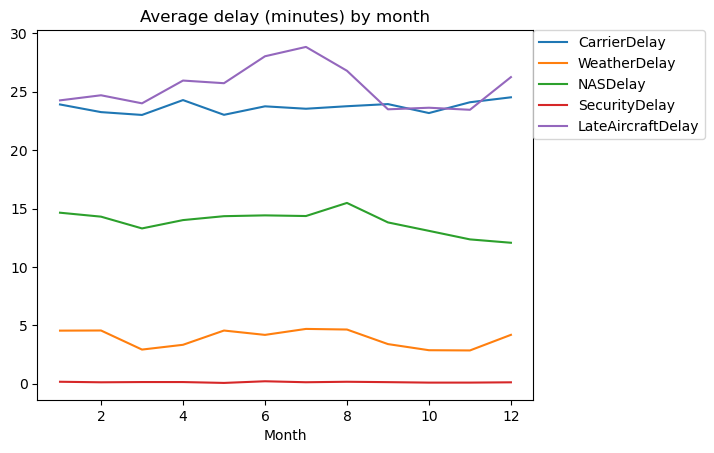

In [211]:
df_delay[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].groupby(df_delay['Month']).mean().plot()

plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1), borderaxespad = 0.0)
plt.title('Average delay (minutes) by month')
plt.show()

Percentage of weather delay:  0.05937532592624404

All flights with arrival delay
count    325994.000000
mean          3.948435
std          32.966931
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        2900.000000
Name: WeatherDelay, dtype: float64

Flights with positive weather delay
       WeatherDelay
count  19356.000000
mean      66.499587
std      118.933850
min        1.000000
25%       14.000000
50%       31.000000
75%       72.000000
max     2900.000000


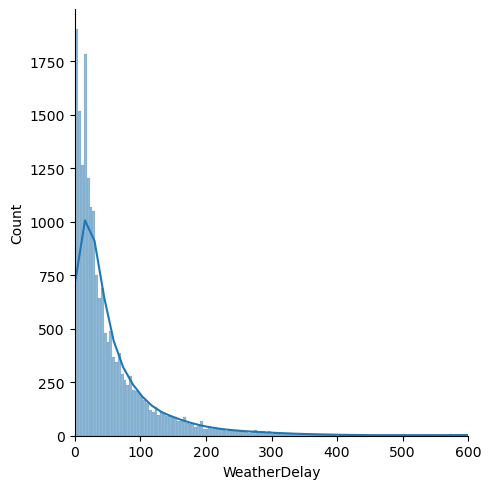

In [185]:
# Weather delays

mask_weatherdelay = (df_delay['WeatherDelay'] > 0)
print('Percentage of weather delay: ', len(df_delay[mask_weatherdelay]) / len(df_delay))

print()

print('All flights with arrival delay')
print(df_delay['WeatherDelay'].describe())

print()

print('Flights with positive weather delay')
print(df_delay[mask_weatherdelay].loc[:, ['WeatherDelay']].describe())

sns.displot(df_delay[mask_weatherdelay], x = 'WeatherDelay', kde = True)
plt.xlim(0, 600) # Limiting x axis to visualize better
plt.show()

Percentage of NAS delay:  0.502438695190709

All flights with arrival delay
count    325994.000000
mean         13.894590
std          33.227317
min           0.000000
25%           0.000000
50%           1.000000
75%          18.000000
max        1487.000000
Name: NASDelay, dtype: float64

Flights with positive NAS delay
            NASDelay
count  163792.000000
mean       27.654299
std        42.624885
min         1.000000
25%         8.000000
50%        17.000000
75%        30.000000
max      1487.000000


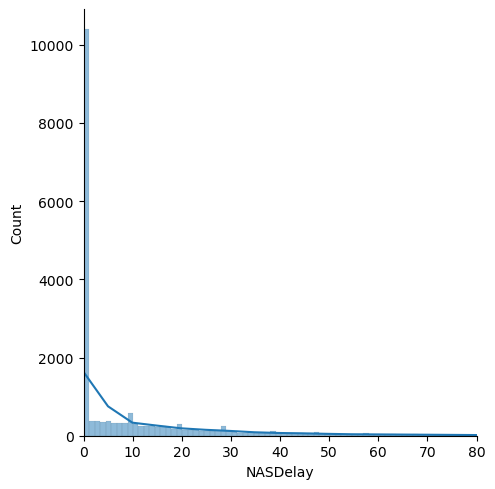

In [188]:
# NAS Delays

mask_NASdelay = (df_delay['NASDelay'] > 0)
print('Percentage of NAS delay: ', len(df_delay[mask_NASdelay]) / len(df_delay))

print()

print('All flights with arrival delay')
print(df_delay['NASDelay'].describe())

print()

print('Flights with positive NAS delay')
print(df_delay[mask_NASdelay].loc[:, ['NASDelay']].describe())

sns.displot(df_delay[mask_weatherdelay], x = 'NASDelay', kde = True)
plt.xlim(0,80) # Limiting x axis to visualize better
plt.show()

Percentage of Security delay:  0.004601311680583078

All flights with arrival delay
count    325994.000000
mean          0.137309
std           4.530627
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1245.000000
Name: SecurityDelay, dtype: float64

Flights with positive Security delay
       SecurityDelay
count    1500.000000
mean       29.841333
std        59.807955
min         1.000000
25%        10.000000
50%        18.000000
75%        30.000000
max      1245.000000


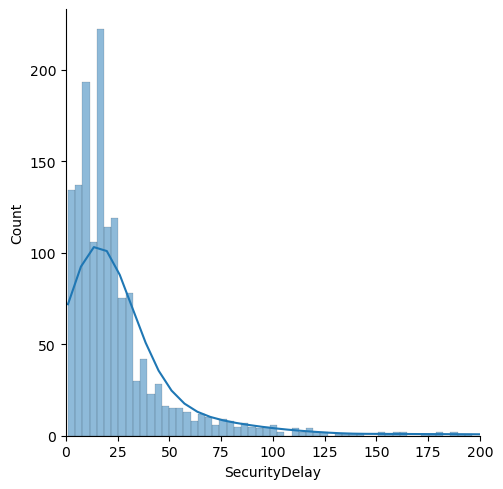

In [187]:
# Security Delays

mask_Securitydelay = (df_delay['SecurityDelay'] > 0)
print('Percentage of Security delay: ', len(df_delay[mask_Securitydelay]) / len(df_delay))

print()

print('All flights with arrival delay')
print(df_delay['SecurityDelay'].describe())

print()

print('Flights with positive Security delay')
print(df_delay[mask_Securitydelay].loc[:, ['SecurityDelay']].describe())

sns.displot(df_delay[mask_Securitydelay], x = 'SecurityDelay', kde = True)
plt.xlim(0,200) # Limiting x axis to visualize better
plt.show()

In [72]:
# Calculate 25th percentile
percentile25 = df['ArrDelayMinutes'].quantile(0.25)

# Calculate 75th percentile
percentile75 = df['ArrDelay'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('Upper limit: ', upper_limit)
print('Lower_limit: ', lower_limit)

Upper limit:  -2.5
Lower_limit:  1.5


## Main conclusions

- Flight delays (delays during travel) might happen but they are not common. More than 75% of total flights arrive at the destination city earlier than expected.
- Arrival delays happened in 21% of all flights. Arrival delays are highly associated with Departure delays. 
  - Departure delays happen in 25-30% of the cases and typically last for 25-85 minutes.
  - Departure delays are connected with the total number of flights at a given time. From 0 to 5 am, when there's only a few flights, departure delays tend to happen less frequently and it is quicker. Throughout the day, departure delays tend to increase.
  - With a high number of flights and shorter departure delay statistics vs. other companies, WN seems to be the best one in terms of delay
  - Big cities tend to have longer total delay times (which is reasonable, considering the higher number of flights), but small cities tend to have the highest averages of departure delays.
- Other types of delay, such as Carrier and Late Aircraft delay have a considerable correlation with Arrival delays.
  - Carrier delay happened in 53% of all cases, lasting typically for 9-44 minutes
  - Late aircraft delay happened in 48% of all cases, lasting typically for 16-65 minutes
  - 5% of total flights have a carrier delay of 0-20 minutes.
  - 5% of total flights have a late aircraft delay of 0-30 minutes.
  - WN seems to be the best company when looking at carrier and late aircraft delays.
- Other types of delay, such as Weather, NAS and Security delay happened less frequently and/or in shorter period of time
  - Weather delay happened in 6% of all flights and lasted typically for 14-72 minutes
  - NAS delay happened in 50% of all flights, which is a high percentage, but lasted typically for 8-30 minutes
  - Security delay happened in less than 1% of all flights and lasted typically for 10-30 minutes
  
To wrap things up, arrival delays are not rare (1 in every 5 flight in this dataset faced some kind o delay) and they are mainly connected to airline issues, such as carrier or aircraft issues, which can cause departure or other kinds of delay. Some companies that we saw in this analysis show better numbers, while others seems to face operational problems. Delays have a higher chance of happening when airport activity is more intense.

Next steps that were not addressed in this analysis could involve focusing on the airline companies that have longer delays and understating why some small cities showed surprising delay numbers (on the negative side).